# Data Analysis

In [116]:
# Libraries we will need
library(ggplot2)
library(gridExtra)
library(dplyr)
library(tm) # Text Mining Package: also has NLP and SLAM
library(SnowballC)
library(wordcloud)

In [117]:
# Inputting Data
data = read.csv('data/Tweets.csv')
cat('Number of Entries: ',dim(data)[1])

Number of Entries:  14640

In [118]:
# Lets look at the info
str(data)

'data.frame':	14640 obs. of  15 variables:
 $ tweet_id                    : num  5.7e+17 5.7e+17 5.7e+17 5.7e+17 5.7e+17 ...
 $ airline_sentiment           : Factor w/ 3 levels "negative","neutral",..: 2 3 2 1 1 1 3 2 3 3 ...
 $ airline_sentiment_confidence: num  1 0.349 0.684 1 1 ...
 $ negativereason              : Factor w/ 11 levels "","Bad Flight",..: 1 1 1 2 3 3 1 1 1 1 ...
 $ negativereason_confidence   : num  NA 0 NA 0.703 1 ...
 $ airline                     : Factor w/ 6 levels "American","Delta",..: 6 6 6 6 6 6 6 6 6 6 ...
 $ airline_sentiment_gold      : Factor w/ 4 levels "","negative",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ name                        : Factor w/ 7701 levels "___the___","__betrayal",..: 1073 3477 7666 3477 3477 3477 1392 5658 1874 7665 ...
 $ negativereason_gold         : Factor w/ 14 levels "","Bad Flight",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ retweet_count               : int  0 0 0 0 0 0 0 0 0 0 ...
 $ text                        : Factor w/ 14427 levels "\"LOL you gu

# Tweets per Airline

In [119]:
prop.table(table(data$airline))


      American          Delta      Southwest         United     US Airways 
    0.18845628     0.15177596     0.16530055     0.26106557     0.19897541 
Virgin America 
    0.03442623 

In [120]:
# Data to plot
tweet_per_airline = as.data.frame(prop.table(table(data$airline)))
colnames(tweet_per_airline) = c('airline', 'Frequency')
tweet_per_airline

airline,Frequency
American,0.18845628
Delta,0.15177596
Southwest,0.16530055
United,0.26106557
US Airways,0.19897541
Virgin America,0.03442623


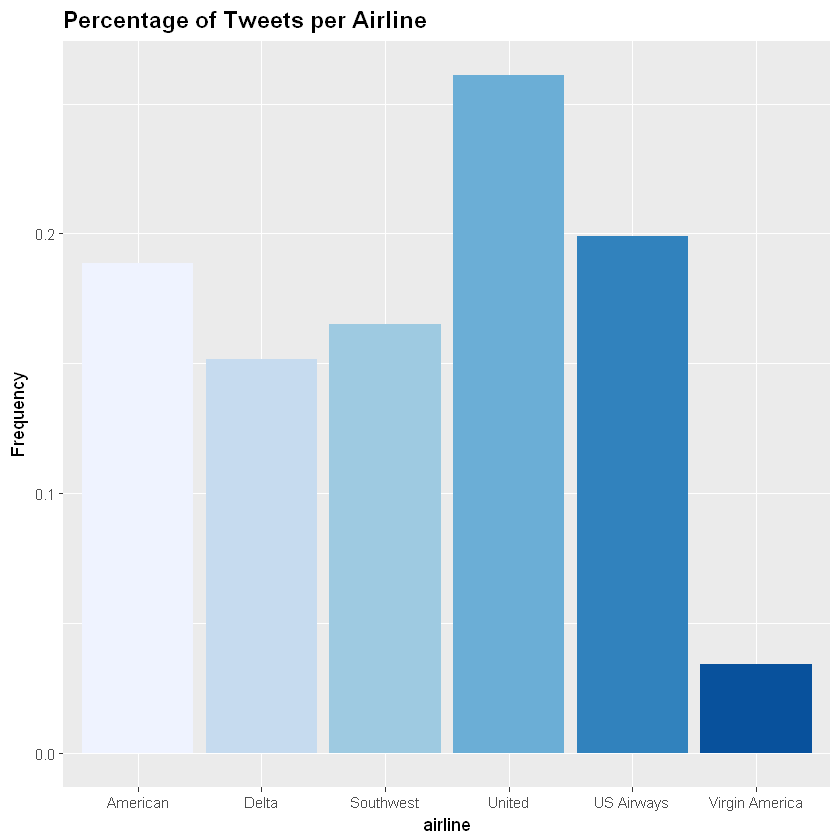

In [121]:
# Bar Data
ggbar = ggplot(tweet_per_airline, aes(x = airline, 
                              y = Frequency, 
                              fill = airline))

# Bar Plot
(ggbar + 
geom_bar(stat = 'identity') + 
scale_fill_brewer() + 
ggtitle('Percentage of Tweets per Airline') +
guides(fill = FALSE) + 
theme(plot.title = element_text(size = 14, face = 'bold', vjust = 1)))

## Conclusion
Most of the tweets are directed toward United, US Airways and American. Southwest and Delta are not too far behind, so lets look at the Proportions between Good, Bad and Neutral before looking into seperate Airlines.

# Proportion Between Good, Bad, and Neutral

In [122]:
# make a table out of the sentiment from data
prop.table(table(data$airline_sentiment))


 negative   neutral  positive 
0.6269126 0.2116803 0.1614071 

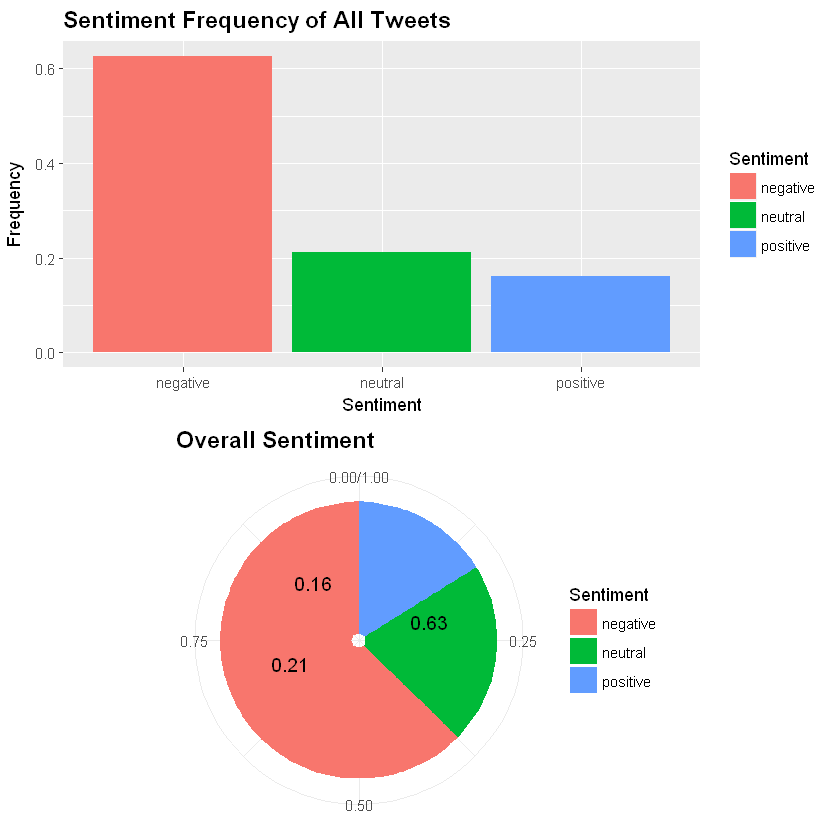

In [123]:
# Data to plot
sent_data = as.data.frame(prop.table(table(data$airline_sentiment)))
colnames(sent_data) = c('Sentiment', 'Frequency')

# Make figure (Note: Not Really Necessary)
blank_figure = theme_minimal() + 
               theme(axis.title.x = element_blank(),
                     axis.title.y = element_blank(),
                     panel.border = element_blank(),
                     axis.ticks = element_blank(),
                     plot.title = element_text(size = 14, face = 'bold'))

# Make the bar and pie
ggbar = ggplot(sent_data, aes(x = Sentiment, y = Frequency, fill = Sentiment))
ggpie = ggplot(sent_data, aes(x = ''       , y = Frequency, fill = Sentiment))

# Plot Bar Graph
plot1 = ggbar + 
        geom_bar(stat = 'identity') + 
        ggtitle('Sentiment Frequency of All Tweets') +
        theme(plot.title   = element_text(size = 14, face = 'bold'),
              axis.title.y = element_text(vjust = 2),
              axis.title.x = element_text(vjust = -1))

# Plot Pie Chart
plot2 = ggpie + 
        geom_bar(stat = 'identity') + 
        coord_polar("y", start = 0) + 
        blank_figure +
        theme(axis.title.x = element_blank()) + 
        geom_text(aes(y = Frequency/3 + c(0, cumsum(Frequency)[-length(Frequency)]),
                      label = round(Frequency, 2)), 
                      size = 4) + 
        ggtitle('Overall Sentiment')

grid.arrange(plot1, plot2, ncol = 1, nrow = 2)

## Conclusion:
This might seem bad, but this is only for the people who had something to say.  
If you are like me, I usually have an okay experience when I fly. This doesn't lead me to comment or tweet about it. Therefore, I'd say there are a lot more Neutrals than what is shown. If this represented everyone who flew, I'd say neutral and negative would switch proportions. 

This is from 14640 tweets only. This doesn't represent the large amount of people who fly. However, despite there being more neutrals who don't say anything, it is something for airlines to take into consideration because this is what is shown to the public. 

# Sentiment Grouped by Airlines

In [124]:
prop.table(table(data$airline_sentiment, data$airline))

          
             American      Delta  Southwest     United US Airways
  negative 0.13387978 0.06523224 0.08101093 0.17984973 0.15457650
  neutral  0.03162568 0.04938525 0.04535519 0.04760929 0.02602459
  positive 0.02295082 0.03715847 0.03893443 0.03360656 0.01837432
          
           Virgin America
  negative     0.01236339
  neutral      0.01168033
  positive     0.01038251

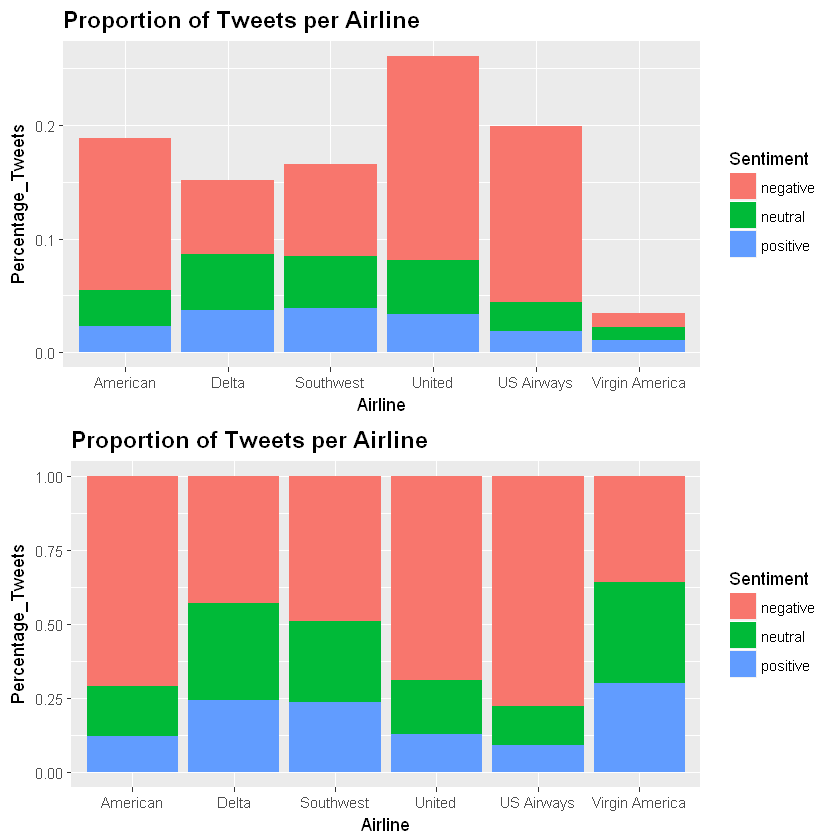

In [125]:
# Data to Plot
airline_sentiment = as.data.frame(prop.table(table(data$airline_sentiment, data$airline)))
colnames(airline_sentiment) = c('Sentiment', 'Airline', 'Percentage_Tweets')

# Bar Data
ggbar = ggplot(airline_sentiment, 
              aes(x = Airline, 
                  y = Percentage_Tweets, 
                  fill = Sentiment)) + 
                  ggtitle('Proportion of Tweets per Airline') +
                  theme(plot.title = element_text(size = 14, face = 'bold', vjust = 1), 
                        axis.title.x = element_text(vjust = -1))

# Bar Plots
plot1 = gbar + geom_bar(stat = 'identity')
plot2 = gbar + geom_bar(stat = 'identity', position = 'fill')

grid.arrange(plot1, plot2, ncol = 1, nrow = 2)

## Conclusion:
The first plot is using the proportion of tweets for each of the respective airlines and their fill of Sentiment.  
The second plot is a lot more useful for each individual airline. United, US Airways, and American seem to be getting the most tweets (seen from plot 1) and it also seems they get the most negative response (seen from plot 2).

Again this could be for reasons like they have more people fly with them, and the more people the more likelihood of bad reviews. Maybe there is something the majority of customers don't like about the flights. Whatever it is, we will investigate this further by seeing what It is about these airlines that made customers give bad reviews.

# Sentiment Investigations

In [126]:
# Data for Plot
negative_reasons = as.data.frame(prop.table(table(data$negativereason)))
colnames(negative_reasons) = c('Reason', 'Frequency')
negative_reasons = negative_reasons[-1, ] # remove first raw as it has no reason specified
negative_reasons

,Reason,Frequency
2,Bad Flight,0.039617486
3,Can't Tell,0.081284153
4,Cancelled Flight,0.057855191
5,Customer Service Issue,0.198770492
6,Damaged Luggage,0.005054645
7,Flight Attendant Complaints,0.032855191
8,Flight Booking Problems,0.036133880
9,Late Flight,0.113729508
10,longlines,0.012158470
11,Lost Luggage,0.049453552


In [127]:
# Grouping
American = subset(data, airline == 'American')
USAirways = subset(data, airline == 'US Airways')
Delta = subset(data, airline == 'Delta')
Southwest = subset(data, airline = 'Southwest')
Virgin = subset(data, airline = 'Southwest')
United = subset(data, airline = 'United')

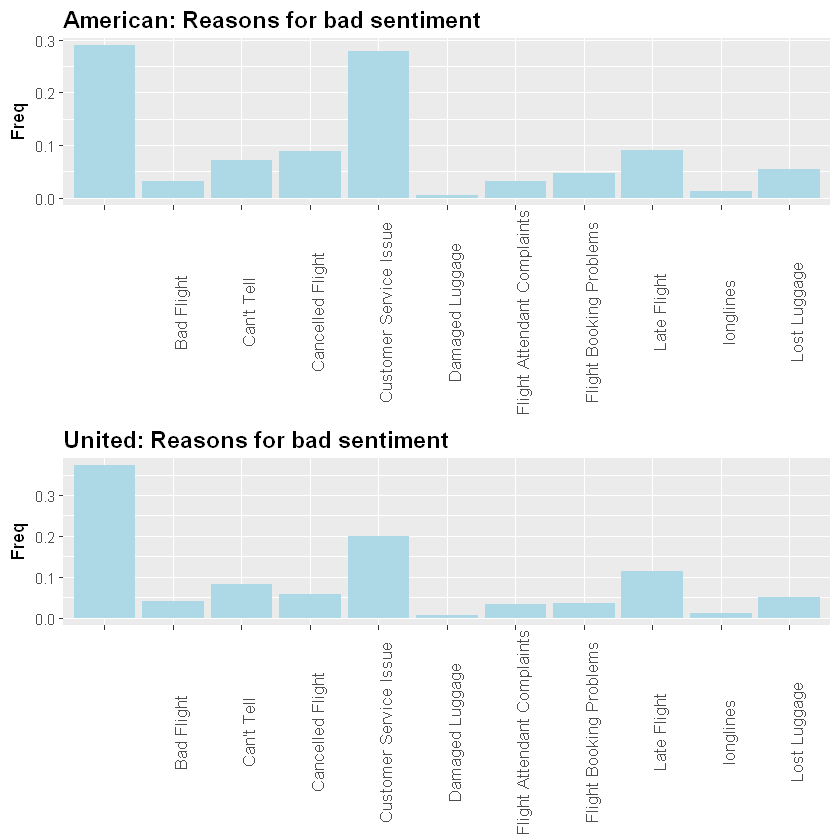

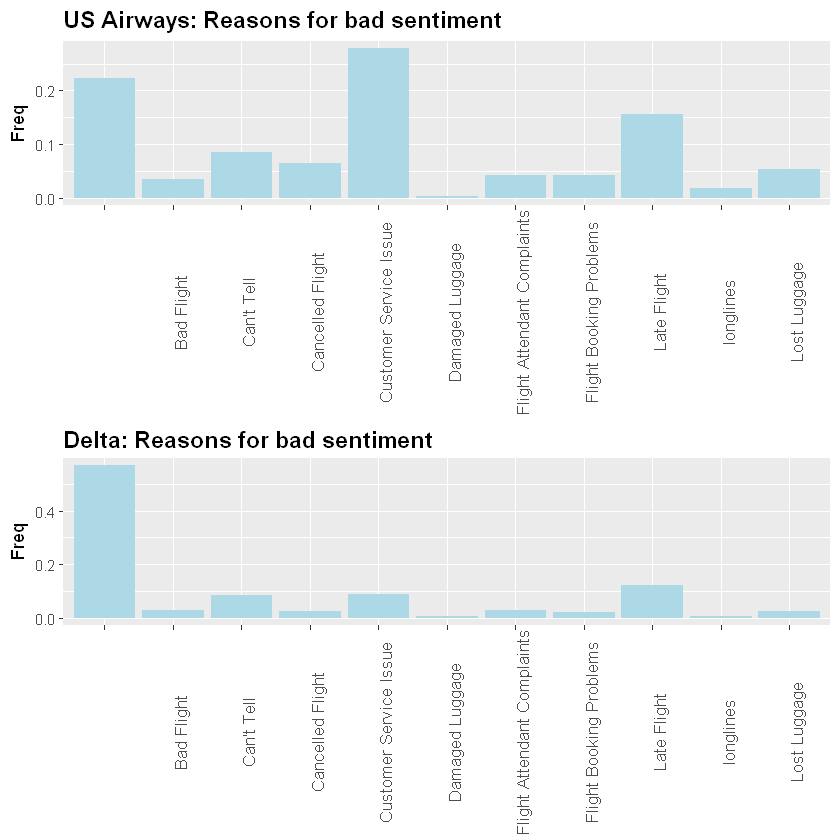

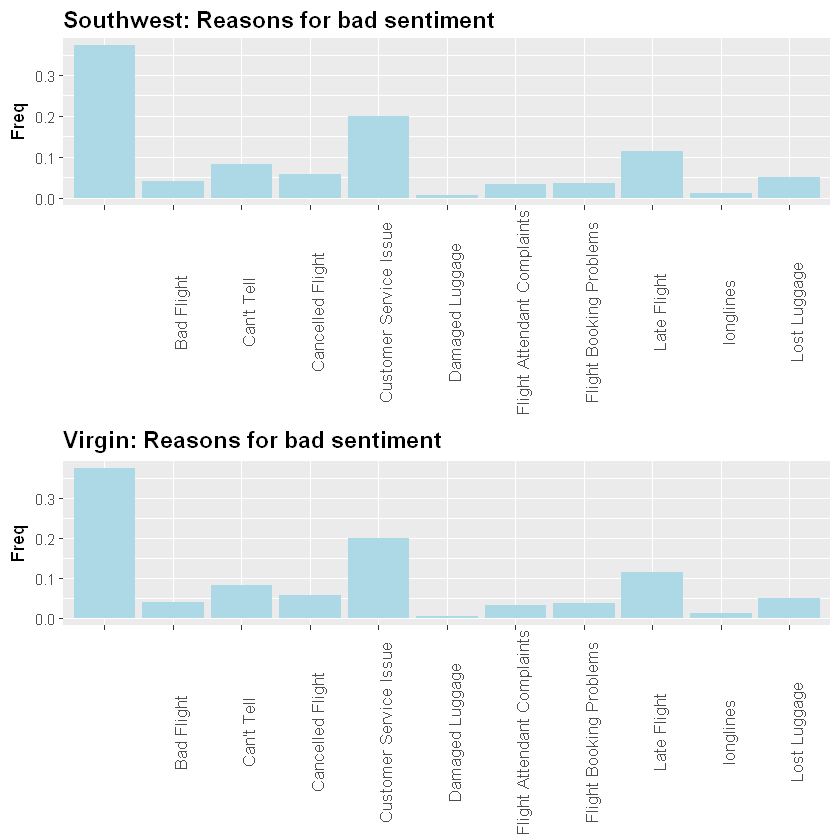

In [128]:
g1 = ggplot(as.data.frame(prop.table(table(American$negativereason))), 
            aes(x = Var1, y = Freq)) +
            geom_bar(stat = 'identity', fill = 'lightblue')
g1 = g1 + ggtitle('American: Reasons for bad sentiment')
g1 = g1 + theme(plot.title = element_text(size = 14, face = 'bold', vjust = 1), 
                axis.title.x = element_blank(),
                axis.text.x  = element_text(angle = 90, size = 10, vjust = 1))

g2 = ggplot(as.data.frame(prop.table(table(United$negativereason))), 
            aes(x = Var1, y = Freq)) +
            geom_bar(stat = 'identity', fill = 'lightblue')
g2 = g2 + ggtitle('United: Reasons for bad sentiment')
g2 = g2 + theme(plot.title = element_text(size = 14, face = 'bold', vjust = 1), 
                axis.title.x = element_blank(),
                axis.text.x = element_text(angle = 90, size = 10, vjust = 1))

g3 = ggplot(as.data.frame(prop.table(table(USAirways$negativereason))), aes(x = Var1, y = Freq)) +
geom_bar(stat = 'identity', fill = 'lightblue')
g3 = g3 + ggtitle('US Airways: Reasons for bad sentiment')
g3 = g3 + theme(plot.title = element_text(size = 14, face = 'bold', vjust = 1), axis.title.x = element_blank(),
                axis.text.x = element_text(angle = 90, size = 10, vjust = 1))

g4 = ggplot(as.data.frame(prop.table(table(Delta$negativereason))), aes(x = Var1, y = Freq)) +
geom_bar(stat = 'identity', fill = 'lightblue')
g4 = g4 + ggtitle('Delta: Reasons for bad sentiment')
g4 = g4 + theme(plot.title = element_text(size = 14, face = 'bold', vjust = 1), axis.title.x = element_blank(),
                axis.text.x = element_text(angle = 90, size = 10, vjust = 1))

g5 = ggplot(as.data.frame(prop.table(table(Southwest$negativereason))), aes(x = Var1, y = Freq)) +
geom_bar(stat = 'identity', fill = 'lightblue')
g5 = g5 + ggtitle('Southwest: Reasons for bad sentiment')
g5 = g5 + theme(plot.title = element_text(size = 14, face = 'bold', vjust = 1), axis.title.x = element_blank(),
                axis.text.x = element_text(angle = 90, size = 10, vjust = 1))

g6 = ggplot(as.data.frame(prop.table(table(Virgin$negativereason))), aes(x = Var1, y = Freq)) +
geom_bar(stat = 'identity', fill = 'lightblue')
g6 = g6 + ggtitle('Virgin: Reasons for bad sentiment')
g6 = g6 + theme(plot.title = element_text(size = 14, face = 'bold', vjust = 1), axis.title.x = element_blank(),
                axis.text.x = element_text(angle = 90, size = 10, vjust = 1))

grid.arrange(g1, g2, ncol = 1, nrow = 2)
grid.arrange(g3, g4, ncol = 1, nrow = 2)
grid.arrange(g5, g6, ncol = 1, nrow = 2)

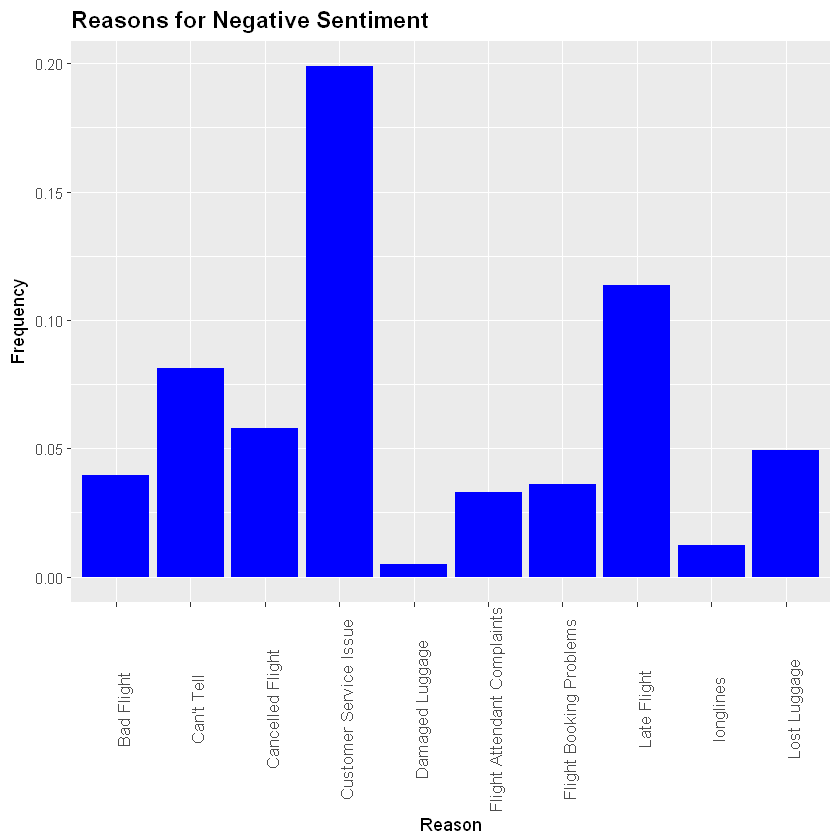

In [129]:
# Graph all the sentiment together to let everyone know what they should work on
gg = ggplot(negative_reasons, aes(x = Reason, y = Frequency)) +
     geom_bar(stat = 'identity', fill = 'blue')
gg = gg + ggtitle('Reasons for Negative Sentiment')
gg = gg + 
    theme(plot.title = element_text(size = 14, 
                                    face = 'bold', 
                                    vjust = 1), 
          axis.title.x = element_text(vjust = -0.1),
          axis.text.x  = element_text(angle = 90, 
                                      size = 10, 
                                      vjust = 1))
gg

## Conclusion:
The empty on the far left indicate the number of neutral and good sentiments. 

All of the Airlines seem similar in most regards. However, we note that US Airways and American need better customer service since they both are worse than everyone else. Us airways being the worst since they have more late flights as well. 

One thing we know by looking at this is all airlines can work better on their customer service. It is bad and hopefully helpful to note that there are several cancelled flights and Lost Luggage across all airlines. 

Cancelled flights could be for a multitude of reasons: late flights and congestion in air traffic, matinence with plane, and more. I hear that airline glitches are the most common reason for such cancellations. I hope that security issues aren't the second most. 

Late and Cancelled flights can't be avoided too much, but it seems my next project should be on flight delays and cancellation.

# Search Down Bad Sentiment Reasons

In [130]:
# Fill NA cells containing "", or " " with NA
data = as.data.frame(apply(data, 2, function(x) gsub("^$|^ $", NA, x)))

In [131]:
apply(data, 2, function(x) sum(is.na(x)))

tweet_id            airline_sentiment 
                           0                            0 
airline_sentiment_confidence               negativereason 
                           0                         5462 
   negativereason_confidence                      airline 
                        4118                            0 
      airline_sentiment_gold                         name 
                       14600                            0 
         negativereason_gold                retweet_count 
                       14608                            0 
                        text                  tweet_coord 
                           0                        13621 
               tweet_created               tweet_location 
                           0                         4733 
               user_timezone 
                        4820

We have 5462 Neutral or Good Tweets for Airlines!

In [132]:
table(data$retweet_count)


    0     1     2     3     4     5     6     7     8     9    11    15    18 
13873   640    66    22    17     5     3     3     1     1     1     1     1 
   22    28    31    32    44 
    2     1     1     1     1 

In [133]:
# For each of the amount of retweets (We will grab the last 5)
for (i in tail(as.numeric(rownames(table(data$retweet_count))))){
    # Print the message
    print(as.character(subset(data, retweet_count == i)$text));
    cat('\n')
}

[1] "Just in case you needed confirmation that \"on fleek\" is dead &amp; gone. RT @JetBlue: Our fleet's on fleek. http://t.co/G4O6yX7TMJ"

[1] "@SouthwestAir beautiful day in Seattle! http://t.co/iqu0PPVq2S"       
[2] "can you not? RT @JetBlue Our fleet's on fleek. http://t.co/413GiAL0yl"

[1] "@USAirways with this livery back in the day. http://t.co/EEqWVAMmiy"

[1] "STOP. USING.THIS.WORD. IF. YOU'RE. A. COMPANY. RT @JetBlue: Our fleet's on fleek. http://t.co/Fd2TNYcTrB"

[1] "@USAirways of course never again tho . Thanks for tweetin ur concern but not Doin anythin to fix what happened. I'll choose wiser next time"

[1] "@USAirways 5 hr flight delay and a delay when we land . Is that even real life ? Get me off this plane , I wanna go home ð ð ð  (3 heel clicks)"



## Conclusion:
The bad ones get retweeted more often. This is understandable since they are more noticed.

# Analyzing Text of The Tweets

In [134]:
data = select(data,airline_sentiment, negativereason, airline, text)
head(data)

airline_sentiment,negativereason,airline,text
neutral,NA,Virgin America,@VirginAmerica What @dhepburn said.
positive,NA,Virgin America,@VirginAmerica plus you've added commercials to the experience... tacky.
neutral,NA,Virgin America,@VirginAmerica I didn't today... Must mean I need to take another trip!
negative,Bad Flight,Virgin America,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse"
negative,Can't Tell,Virgin America,@VirginAmerica and it's a really big bad thing about it
negative,Can't Tell,Virgin America,@VirginAmerica seriously would pay $30 a flight for seats that didn't have this playing. it's really the only bad thing about flying VA


In [135]:
# Removing @airline with regular expressions
data$text = gsub("^@\\w+ *", "", data$text)
head(data)

airline_sentiment,negativereason,airline,text
neutral,NA,Virgin America,What @dhepburn said.
positive,NA,Virgin America,plus you've added commercials to the experience... tacky.
neutral,NA,Virgin America,I didn't today... Must mean I need to take another trip!
negative,Bad Flight,Virgin America,"it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse"
negative,Can't Tell,Virgin America,and it's a really big bad thing about it
negative,Can't Tell,Virgin America,seriously would pay $30 a flight for seats that didn't have this playing. it's really the only bad thing about flying VA


In [136]:
# group tweets in 2 dataframes according to positive or negative sentiment
positive = subset(data, airline_sentiment == 'positive')
negative = subset(data, airline_sentiment == 'negative')

cat(paste('Num of Positives: ',dim(positive)[1]))
cat('\n')
cat(paste('Num of Negtives : ',dim(negative)[1]))

Num of Positives:  2363
Num of Negtives :  9178

In [137]:
# These words are not useful in getting meaning
words_to_remove = c(stopwords("english"),"can","get","now",'will')

In [138]:
# generate a function to analyse corpus text

analyseText = function(text_to_analyse){
    # analyse text and generate matrix of words
    # Returns a dataframe containing 1 tweet per row, one word per column
    # and the number of times the word appears per tweet
    CorpusTranscript = Corpus(VectorSource(text_to_analyse))
    CorpusTranscript = tm_map(CorpusTranscript, content_transformer(tolower), lazy = T)
    CorpusTranscript = tm_map(CorpusTranscript, PlainTextDocument, lazy = T)
    CorpusTranscript = tm_map(CorpusTranscript, removePunctuation)
    CorpusTranscript = tm_map(CorpusTranscript, removeWords, words_to_remove)
    CorpusTranscript = tm_map(CorpusTranscript, removeWords, stopwords("english"))
    CorpusTranscript = DocumentTermMatrix(CorpusTranscript)
    CorpusTranscript = removeSparseTerms(CorpusTranscript, 0.97) # keeps a matrix 97% sparse
    CorpusTranscript = as.data.frame(as.matrix(CorpusTranscript))
    colnames(CorpusTranscript) = make.names(colnames(CorpusTranscript))
    
    return(CorpusTranscript)
}

In [139]:
# Analysis of Negative Tweets
words = analyseText(negative$text)
cat("Number of Words Per Line:", dim(words)[2])

# Text Mining of Negative Words
freqWords_neg = colSums(words)
freqWords_neg = freqWords_neg[order(freqWords_neg, decreasing = T)]
head(freqWords_neg)

Number of Words Per Line: 35

flight cancelled   service     hours      just      help 
     2900       920       740       644       614       610

In [140]:
# Analysis of Positive Tweets
words = analyseText(positive$text)
cat("Number of Words Per Line:", dim(words)[2])

# Text Mining for Positive Words
freqWords_pos = colSums(words)
freqWords_pos = freqWords_pos[order(freqWords_pos, decreasing = T)]
head(freqWords_pos)

Number of Words Per Line: 21

thanks   thank  flight   great    just service 
    608     453     371     233     179     159

In [141]:
# Thank and Thanks will be the same word in this case
freqWords_pos[1] = freqWords_pos[1] + freqWords_pos[2]
freqWords_pos = freqWords_pos[-2]
head(freqWords_pos)

thanks  flight   great    just service    love 
   1061     371     233     179     159     133

## Conclusion:
- Cancelled seemed to pop up a lot. 
- Service negative popped up more than service positive, as we know to be true from earlier.
- Hours in negative is probably referring to wait time or delay.

# Clustering Words

In [142]:
analyseText2 = function(text_to_analyse){
    # analyse text and generate matrix of words
    # Returns a dtm containing 1 tweet per row, one word per column
    # and the number of times the word appears per tweet
    CorpusTranscript = Corpus(VectorSource(text_to_analyse))
    CorpusTranscript = tm_map(CorpusTranscript, content_transformer(tolower), lazy = T)
    CorpusTranscript = tm_map(CorpusTranscript, PlainTextDocument, lazy = T)
    CorpusTranscript = tm_map(CorpusTranscript, removePunctuation)
    CorpusTranscript = tm_map(CorpusTranscript, removeWords, words_to_remove)
    CorpusTranscript = tm_map(CorpusTranscript, removeWords, stopwords("english"))
    CorpusTranscript = DocumentTermMatrix(CorpusTranscript)
    CorpusTranscript = removeSparseTerms(CorpusTranscript, 0.97) # keeps a matrix 97% sparse
    
    return(CorpusTranscript)
}

In [143]:
# getting matrices and not dataframes because we can't use them for dendrogram
words_neg = analyseText2(negative$text)
words_pos = analyseText2(positive$text)

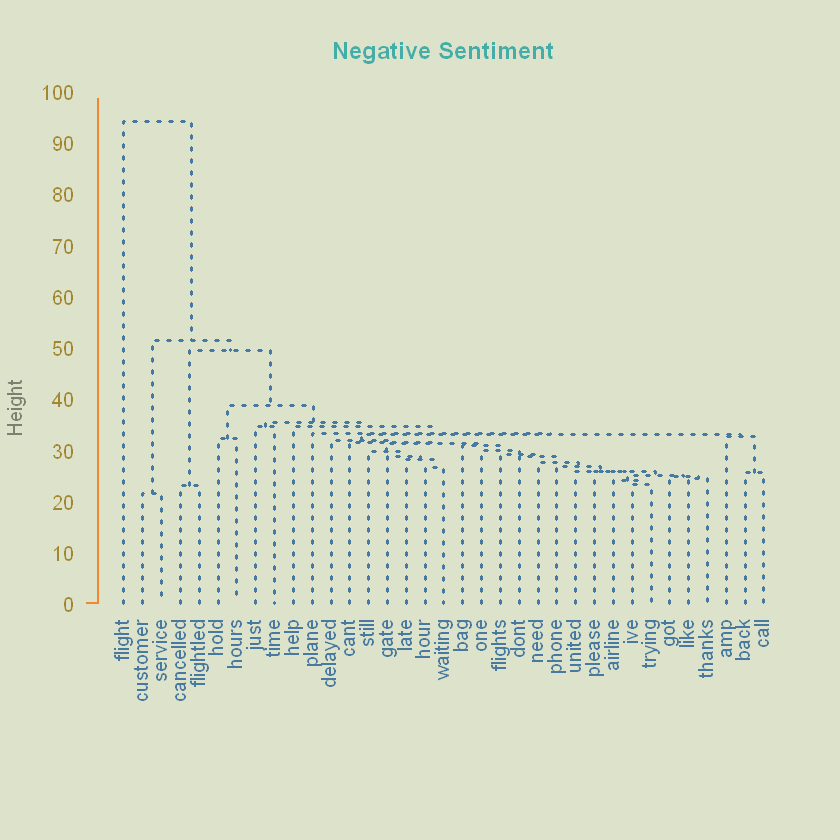

In [144]:
# hierarchical clustering with dendrogram
d = dist(t(as.matrix(words_neg)), method = 'euclidean')
fit = hclust(d = d, method = 'ward.D')

#dendrogram
op = par(bg = "#DDE3CA")

plot(fit, col = "#487AA1", 
     col.main = "#45ADA8", col.lab = "#7C8071", 
     main = 'Negative Sentiment', 
     xlab = '',
     col.axis = "#F38630", 
     lwd = 3, lty = 3, 
     sub = "", 
     hang = -1, 
     axes = FALSE)

# add axis
axis(side = 2, 
     at = seq(0, 400, 100), 
     col = "#F38630", 
     labels = FALSE, 
     lwd = 2)

# add text in margin
mtext(seq(0, 100, 10), 
      side = 2, 
      at = seq(0, 100, 10), 
      line = 1, 
      col = "#A38630", 
      las = 2)

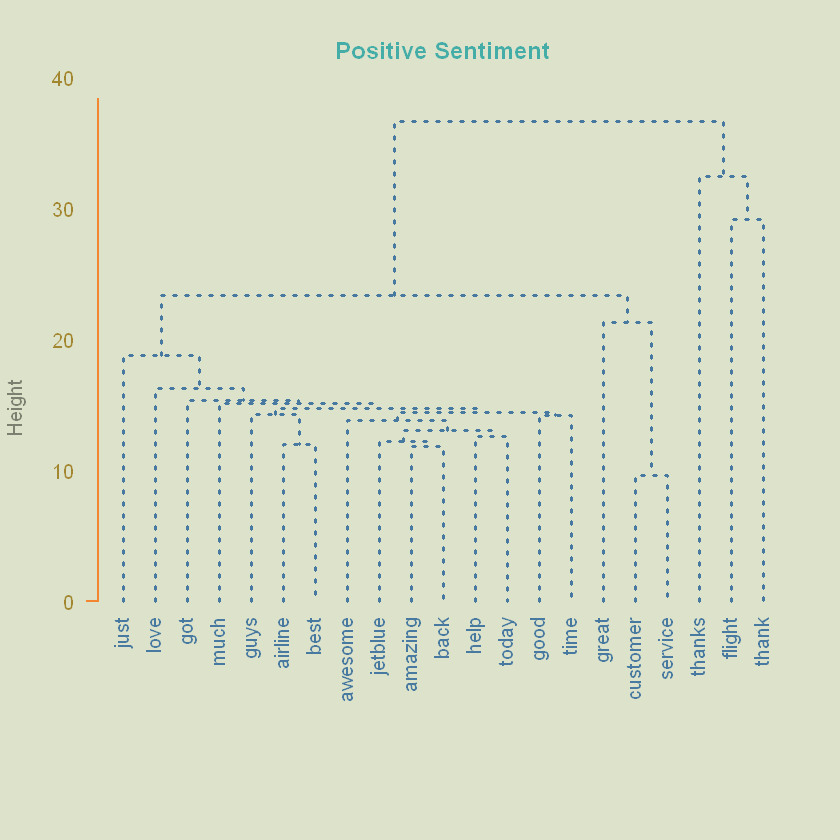

In [145]:
# positive sentiment tweets
d = dist(t(as.matrix(words_pos)), method = 'euclidean')
fit = hclust(d = d, method = 'ward.D')

# dendrogram
op = par(bg = "#DDE3CA")

plot(fit, 
     col = "#487AA1", 
     col.main = "#45ADA8", 
     col.lab = "#7C8071", 
     main = 'Positive Sentiment', 
     xlab = '',
     col.axis = "#F38630", 
     lwd = 3, lty = 3, 
     sub = "", 
     hang = -1, 
     axes = FALSE)

# add axis
axis(side = 2, 
     at = seq(0, 400, 100), 
     col = "#F38630", 
     labels = FALSE, 
     lwd = 2)

# add text in margin
mtext(seq(0, 100, 10), 
      side = 2, 
      at = seq(0, 100, 10), 
      line = 1, 
      col = "#A38630", 
      las = 2)

## Conclusion:
### How to read Dendrogram:
- Every two branches are related.
- If a branch breaks off into more branches, they are all still related to the initial branch that didn't break off.

It's good to see customer service be grouped together as expected. 

It is also good to see that flight and thank(s) are related to all the positive sentiments. This shows that customer service was related to everything.  

On the negative we see that the related words like waiting, gate, delayed, and hours are related. Presumably they are talking about time. While bag is also related, probably meaning sometimes people are waiting for their bags?

# Visualization of Tweet Locations

In [156]:
data = read.csv('data/Tweets.csv')

location = data$tweet_coord
location = location[complete.cases(location)] # remove NAs
location = as.data.frame(location)
location$count =  1 # add a count column filled with 1s
location$location = as.character(location$location)
#remove duplicate locations and count the times they appeared, write the count in the count column
location = aggregate(count~location, data = location, FUN = sum)
location = location[-5,] # removes row containing coords [0,0] which are probably wrong
coords = strsplit(location$location, ',') 

# separate lat and long from location
lat = NULL
long = NULL
for (i in 1:length(coords)) {
    lat = c(lat, substring(coords[[i]][1], 2)) # removes first character which is [
    long = c(long, coords[[i]][2]) 
}

location$lat = lat
location$long = long

# remove ]
location$long = substr(location$long, 1, nchar(location$long)-1)

location$lat = as.numeric(location$lat)
location$long = as.numeric(location$long)
   
head(location)
cat('The different numbers of locations:', dim(location))

,location,count,lat,long
1,,13621,NA,NA
2,"[-33.87144962, 151.20821275]",1,-33.871450,151.2082
3,"[-37.8536992, 145.1106176]",1,-37.853699,145.1106
4,"[-38.0269936, 145.2110041]",1,-38.026994,145.2110
6,"[0.0, 0.0]",164,0.000000,0.0000
7,"[1.3523078, 103.8637764]",1,1.352308,103.8638


The different numbers of locations: 832 4

In [157]:
# Since this gave us Lat and Long, we'll use a map.
require(maps)

Warning message:
"Removed 1 rows containing missing values (geom_point)."Warning message:
"Removed 57 rows containing missing values (geom_point)."

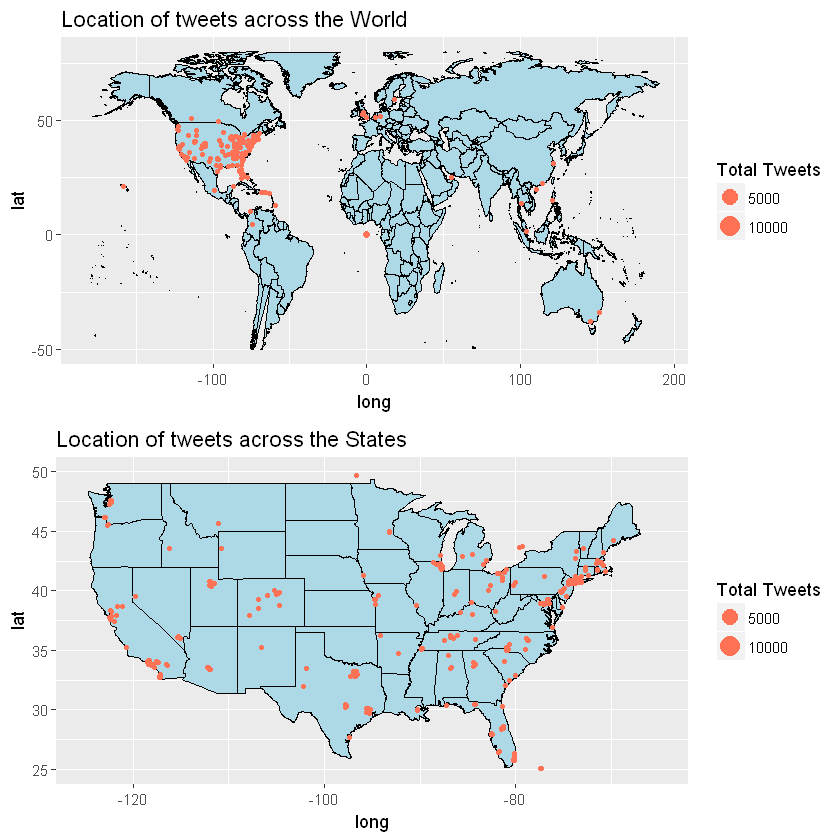

In [158]:
# World Travel map
world_map <- map_data("world")
g1 = ggplot()
g1 = g1 + geom_polygon(data=world_map, aes(x=long, y=lat, group = group), colour="black", fill = 'lightblue') + 
ggtitle("Location of tweets across the World")
g1 = g1 + geom_point(data=location, aes(x=long, y=lat, size = count), color="coral1") + scale_size(name="Total Tweets")
g1 = g1 + ylim(-50, 80)

# There is a lot in the US, so we should look at it
states <- map_data("state")
g2 = ggplot()
g2 =g2 + geom_polygon(data=states, aes(x=long, y=lat, group = group), colour="black", fill = 'lightblue') + 
ggtitle("Location of tweets across the States")
g2 = g2 + geom_point(data=location, aes(x=long, y=lat, size = count), color="coral1") + scale_size(name="Total Tweets")
g2 = g2 + xlim(-125, -65) + ylim(25, 50)

grid.arrange(g1, g2, ncol=1, nrow = 2)

# Conclusion of Project:
### Here is what we found
- Most tweets have negative sentiment (>60%) and most are from the US.
- Most tweets are targeted towards United airlines, then American and US Airways.
- Virgin receives very few tweets.
- Main reasons for negative sentiment are Customer Service Issues and Late Flights.
- Negative sentiment tweets towards Delta are based mostly on late flights and not so much on Customer Service Issues as for the rest of the airlines.
- The flight is almost never the issue with customers and damaged luggage is rare.

We can conduct investigations and find more data from tweets from a later date to see if airlines respond and fix up what they need to. For now, I will find out what is causing delays.